In [1]:
!conda env list

# conda environments:
#
                         /Users/pengl7/Library/r-miniconda
                         /Users/pengl7/Library/r-miniconda/envs/r-reticulate
base                     /Users/pengl7/opt/anaconda3
GenoML                   /Users/pengl7/opt/anaconda3/envs/GenoML
base2                    /Users/pengl7/opt/anaconda3/envs/base2
genomics                 /Users/pengl7/opt/anaconda3/envs/genomics
matplot_corey            /Users/pengl7/opt/anaconda3/envs/matplot_corey
plot                  *  /Users/pengl7/opt/anaconda3/envs/plot
r-tutorial               /Users/pengl7/opt/anaconda3/envs/r-tutorial
scanpy-env               /Users/pengl7/opt/anaconda3/envs/scanpy-env



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [3]:
plt.style.use("fivethirtyeight")
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [4]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [2]:
sns.__version__

'0.11.0'

In [5]:
import os
os.chdir('/Users/pengl7/Downloads/WGS/compare-variants/NIST/')

In [6]:
%ls -lth

total 69112
-rw-r--r--  1 pengl7  NIH\Domain Users    21M Sep 25 16:58 long_cleared.csv
-rw-r-----  1 pengl7  NIH\Domain Users    12M Sep 25 10:35 long4_with_title


In [217]:
# the long_cleared_QD has removed the reads with DP=0 compared to long_cleared.csv
# it also has correct calculation of QD (QUAL/DP)
# it has 339850 WITH 10 couts less than long_cleared.csv
df = pd.read_csv("long_cleared_QD.csv")

In [218]:
print(df.shape)
print()
df.head()

(339850, 10)



,POS,UNMATCH,TYPE,QUAL,FS,AF,DP,GQ,MQ,QD
0,10146,1,1,135.96,0.000,1.0,10.0,9.0,51.59,13.596000
1,11391,1,0,82.28,0.000,1.0,3.0,9.0,39.66,27.426667
2,11921,1,0,36.77,0.000,0.5,6.0,65.0,43.83,6.128333
3,12198,1,0,139.03,0.000,1.0,4.0,12.0,49.89,34.757500
4,12383,1,0,589.03,3.522,1.0,18.0,12.0,44.06,32.723889


In [23]:
df.dtypes

POS          int64
UNMATCH      int64
TYPE         int64
QUAL       float64
FS         float64
AF         float64
DP         float64
GQ         float64
MQ         float64
QD         float64
dtype: object

In [219]:
# for the sake of plotting, keep the TYPE as float instead of categorical
#df["TYPE"] = df["TYPE"].astype("category")
df["UNMATCH"] = df["UNMATCH"].astype("category")

In [220]:
df.describe()

,POS,TYPE,QUAL,FS,AF,DP,GQ,MQ,QD
count,3.398500e+05,339850.000000,339850.000000,339850.000000,339850.000000,339850.000000,339850.000000,339850.000000,339850.000000
mean,1.256498e+08,0.161136,480.453901,1.734002,0.701234,19.791552,78.838855,59.430577,24.165223
std,7.641346e+07,0.367657,720.776478,3.342272,0.247944,22.881223,27.072391,2.707447,12.603838
min,1.014600e+04,0.000000,30.250000,0.000000,0.000200,1.000000,0.000000,20.000000,0.119897
25%,5.925464e+07,0.000000,233.770000,0.000000,0.500000,14.000000,59.000000,60.000000,13.952692
50%,1.148287e+08,0.000000,385.770000,0.000000,0.500000,19.000000,99.000000,60.000000,20.125909
75%,1.950169e+08,0.000000,647.770000,2.218000,1.000000,24.000000,99.000000,60.000000,37.985625
max,2.489456e+08,1.000000,117461.000000,357.189000,1.000000,3142.000000,99.000000,60.000000,1006.255000


In [136]:
df.to_csv("long_cleared_QD.csv", index=None)

In [ ]:
# some choices of plot paramters

# using mulitple="stack"
# ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", multiple="stack", log_scale=True, legend=False)
#  missleading in the edge

# using fill=True
# ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", fill=True, log_scale=True, legend=False)
# color is too light

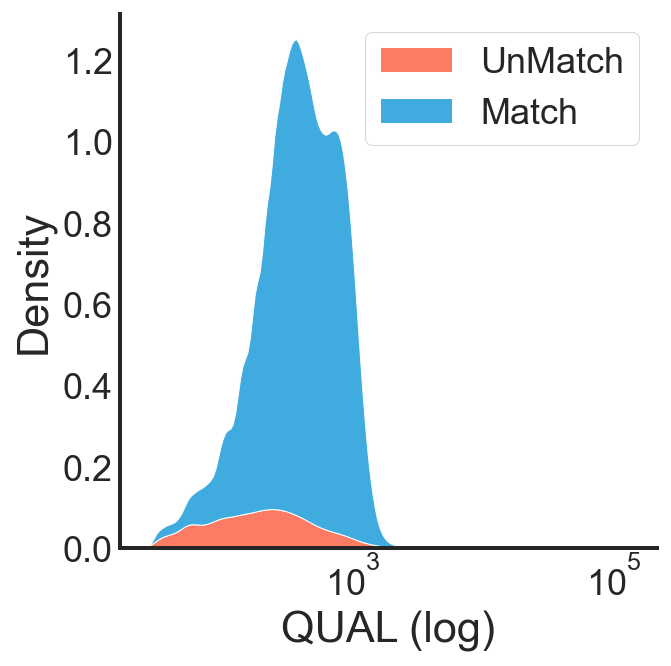

In [28]:
ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", multiple="stack", log_scale=True, legend=False)
plt.legend(labels=['UnMatch', 'Match'])
ax.set(xlabel="QUAL (log)")

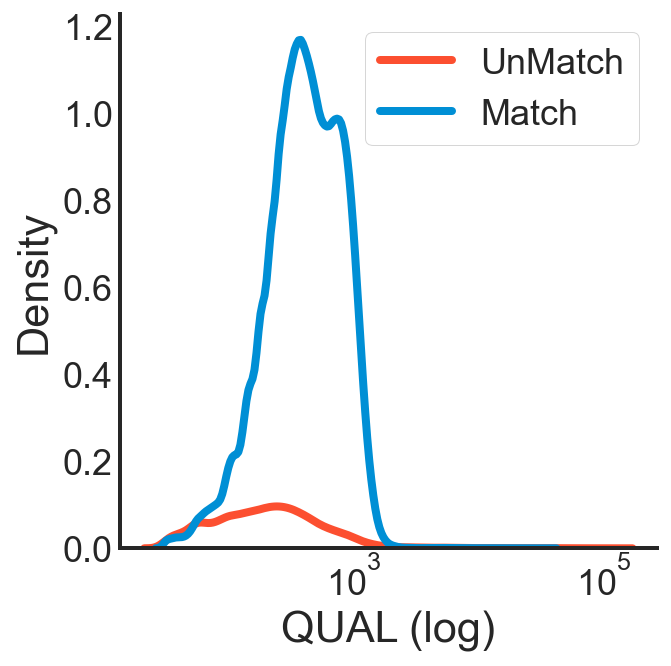

In [51]:
ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", log_scale=True, legend=False)
plt.legend(labels=['UnMatch', 'Match'])
ax.set(xlabel="QUAL (log)")

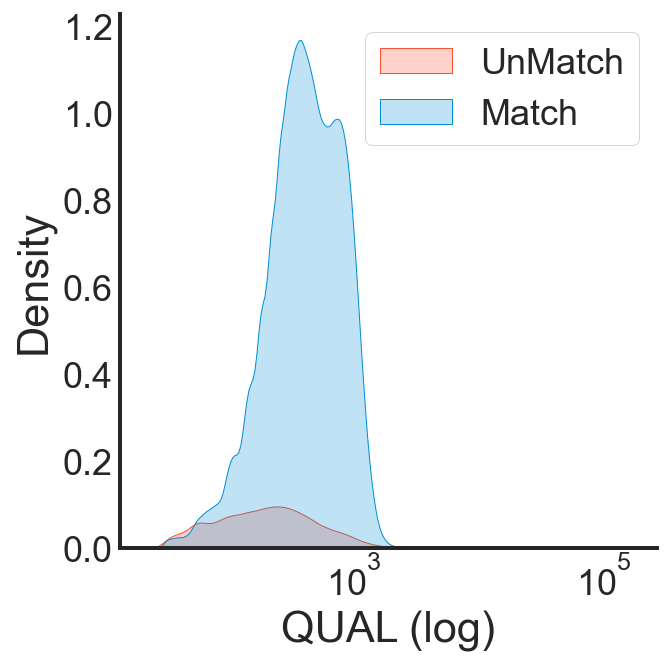

In [48]:
ax=sns.displot(df, x="QUAL", hue="UNMATCH", kind="kde", fill=True, log_scale=True, legend=False)
plt.legend(labels=['UnMatch', 'Match'])
ax.set(xlabel="QUAL (log)")

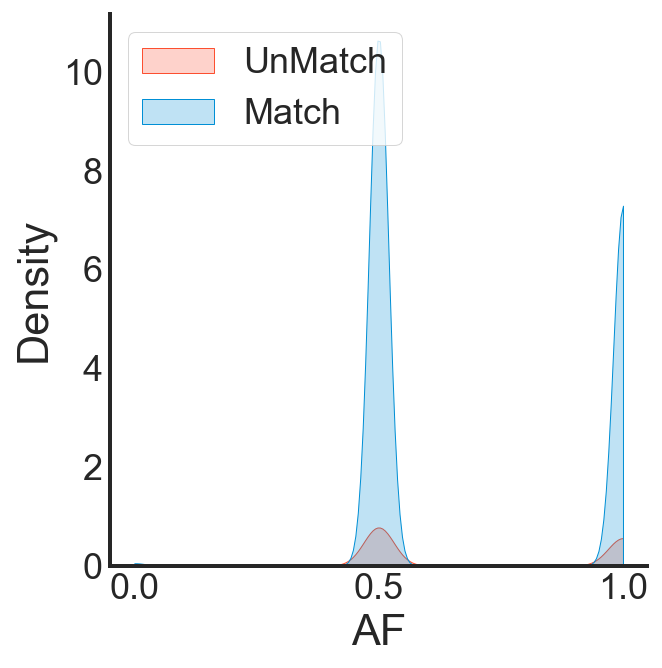

In [281]:
sns.displot(df, x="AF", hue="UNMATCH", kind="kde", fill=True, legend=False, cut=0)
plt.legend(loc='upper left', labels=['UnMatch', 'Match'])

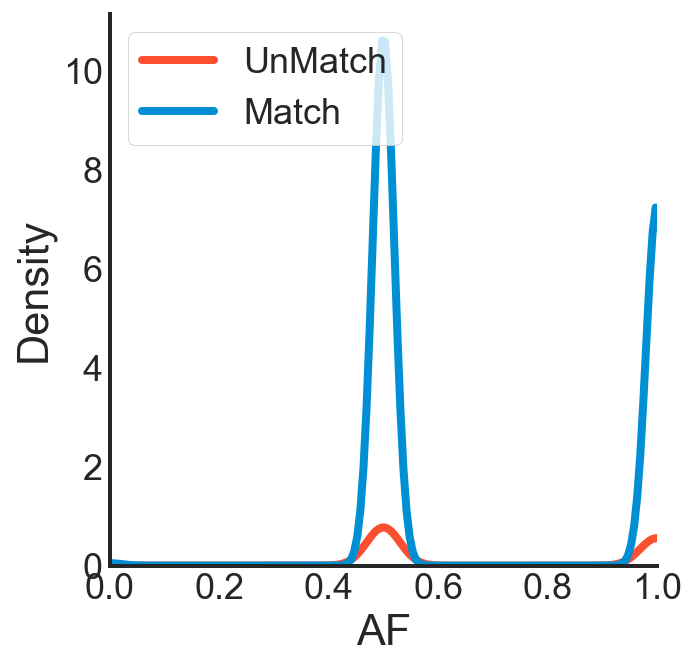

In [280]:
ax=sns.displot(df, x="AF", hue="UNMATCH", legend=False, kind="kde")
ax.set(xlim=(0,1))
plt.legend(loc='upper left', labels=['UnMatch', 'Match'])

In [223]:
# get the variants with AF < 0.05

filt_af = df["AF"]< 0.05
maf_df = df[filt_af]
print(maf_df.shape)

(897, 10)


In [138]:
# calculate the number of unmatch in these 897 

maf_df["UNMATCH"].value_counts()

0    844
1     53
Name: UNMATCH, dtype: int64

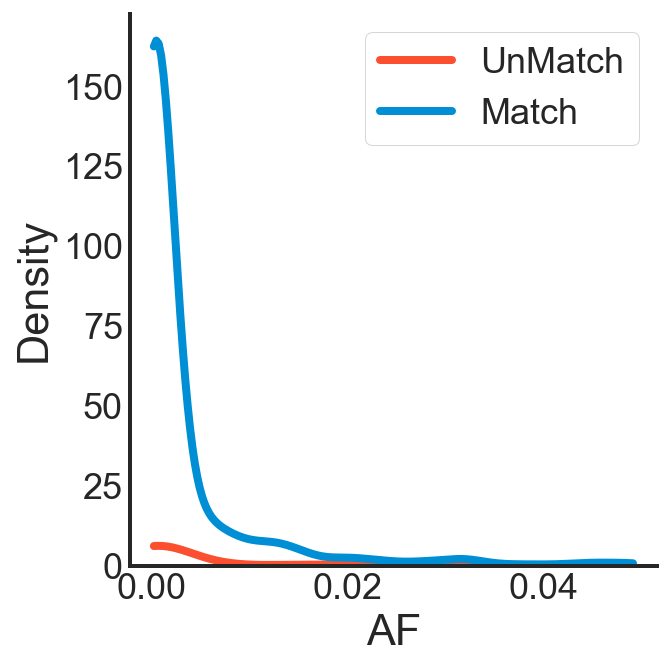

In [275]:
sns.displot(maf_df, x="AF", hue="UNMATCH", kind="kde", legend=False, cut=0)
plt.legend(labels=['UnMatch', 'Match'])

In [139]:
844/(844+53)

0.9409141583054627

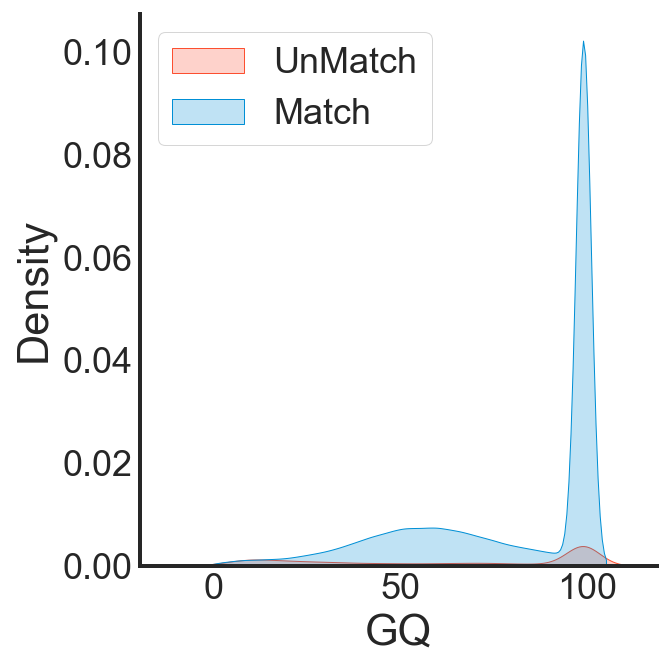

In [52]:
sns.displot(df, x="GQ", hue="UNMATCH", kind="kde", fill=True, legend=False)
plt.legend(loc='upper left', labels=['UnMatch', 'Match'])

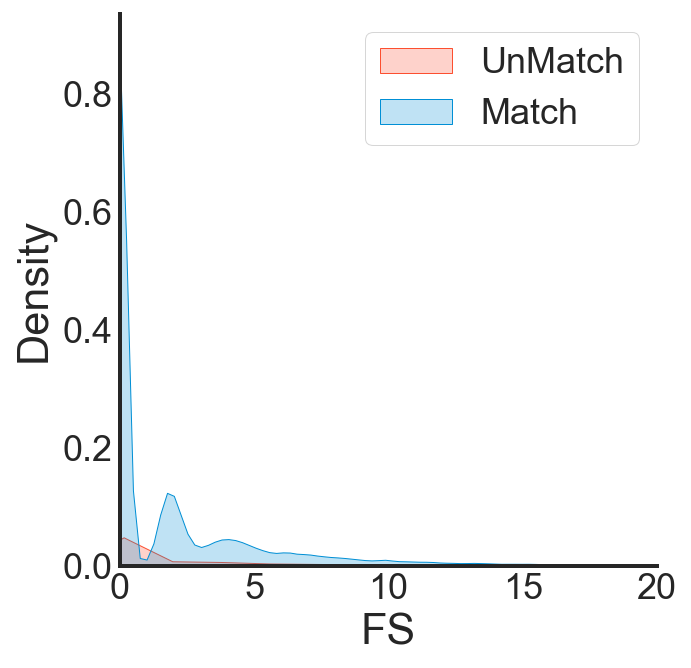

In [56]:
ax=sns.displot(df, x="FS", hue="UNMATCH", kind="kde", fill=True, legend=False)
ax.set(xlim=(0,20))
plt.legend(labels=['UnMatch', 'Match'])

In [170]:
np.log(60)

4.0943445622221

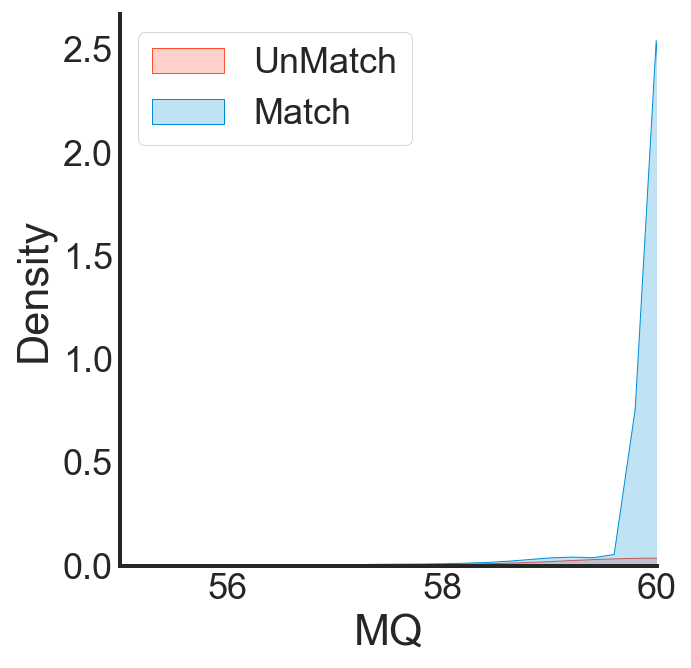

In [283]:
ax=sns.displot(df, x="MQ", hue="UNMATCH", kind="kde", fill=True,legend=False)
ax.set(xlim=(55,60))
plt.legend(loc="upper left", labels=['UnMatch', 'Match'])

In [61]:
df["MQ"].max()

60.0

In [222]:
df["MQ"].min()

20.0

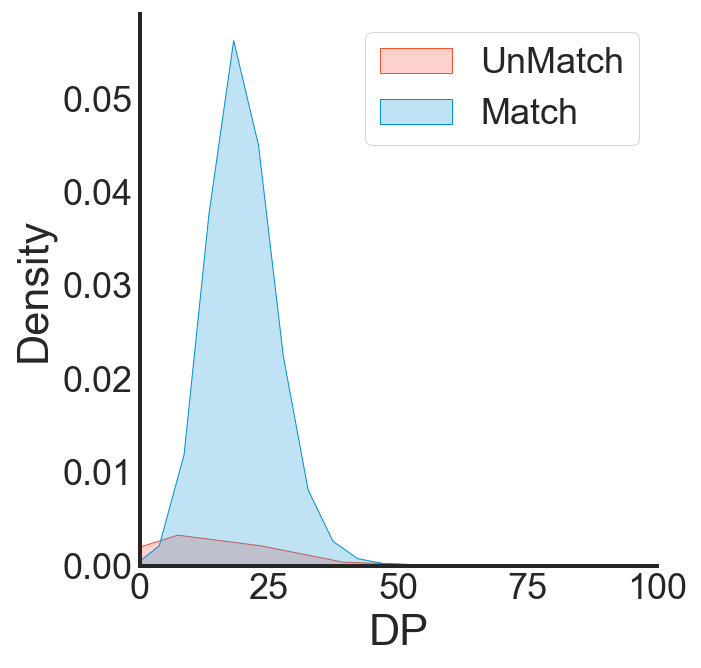

In [64]:
ax = sns.displot(df, x="DP", hue="UNMATCH", kind="kde", fill=True, legend=False)
ax.set(xlim=(0, 100))
plt.legend(labels=['UnMatch', 'Match'])

In [284]:
print(len(df[df["DP"]==0]))
print(len(df[df["DP"]<10]))
print(len(df[df["DP"]>40]))

0
26734
3199


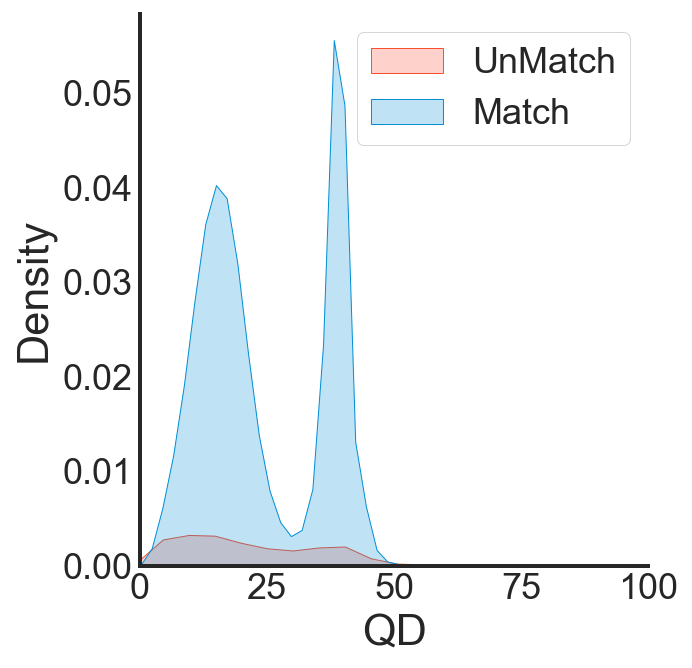

In [69]:
ax = sns.displot(df, x="QD", hue="UNMATCH", kind="kde", fill=True, legend=False)
ax.set(xlim=(0, 100))
plt.legend(labels=['UnMatch', 'Match'])

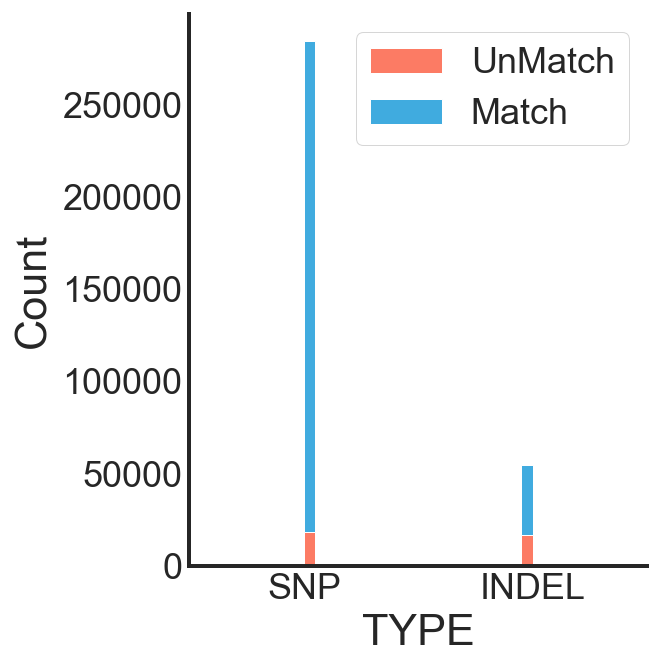

In [106]:
ax=sns.displot(df, x="TYPE", hue="UNMATCH", multiple="stack", legend=False)
plt.legend(labels=['UnMatch', 'Match'])
ax.set_xticklabels(["", 'SNP', "", 'INDEL'])

In [121]:
df["TYPE"] = df["TYPE"].astype("int64")

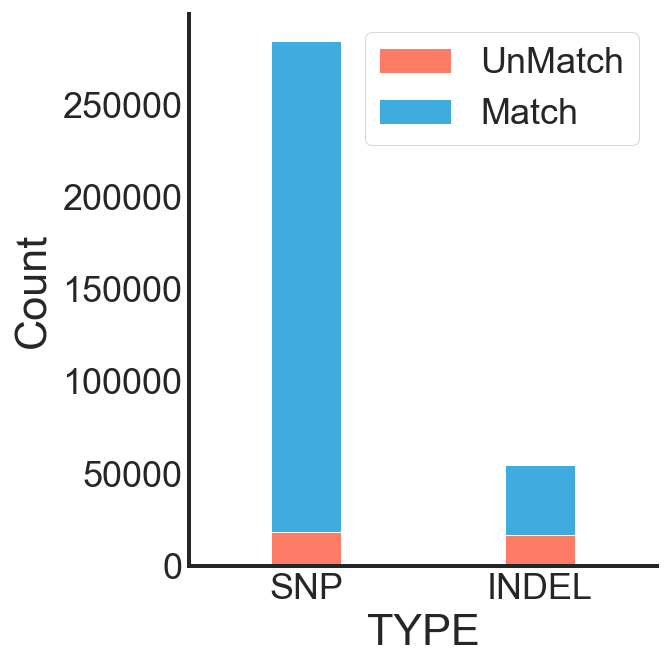

In [134]:
ax=sns.displot(df, x="TYPE", hue="UNMATCH", multiple="stack", legend=False, discrete=True, shrink=0.3)
plt.legend(labels=['UnMatch', 'Match'])
ax.set_xticklabels(['', 'SNP', '',  'INDEL'])

## Check the quality of the whole vcf files

In [ ]:
# draw venn diagram

In [137]:
import matplotlib_venn as venn

In [ ]:
LONG VS REF ON chr1
Found 305039 sites common to both files.
Found 34553 sites only in main file.
Found 9939 sites only in second file.
Found 290 non-matching overlapping sites.
After filtering, kept 339882 out of a possible 339882 Sites

In [154]:
def cal_overlap(c, x_uniq, y_uniq):
    perX = 100*c / (c+x_uniq)
    print("1st overlap: ", perX)
    perY = 100*c / (c+y_uniq)
    print("2nd overlap: ", perY)

In [155]:
cal_overlap(305039,34553,9939)

1st overlap:  89.82514311291196
2nd overlap:  96.84454152353497


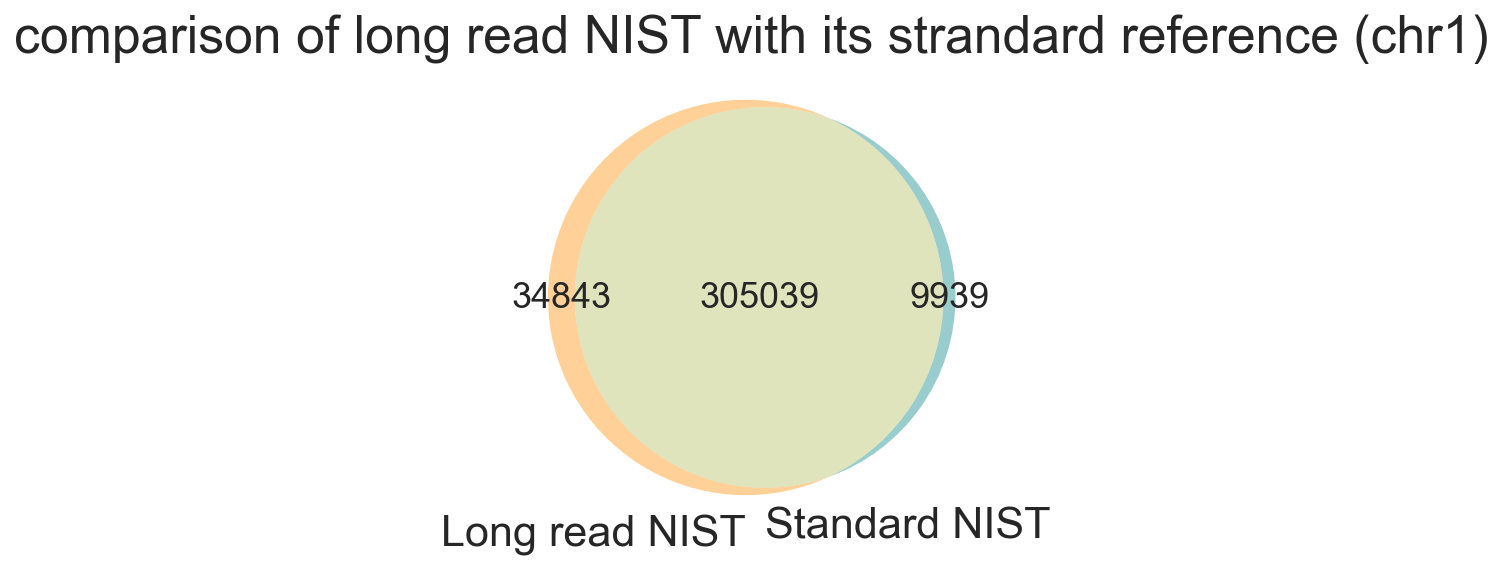

In [151]:
color1 = "darkorange"
color2 = "teal"

plt.title('comparison of long read NIST with its strandard reference (chr1)')
v1=venn.venn2(subsets = (34843, 9939, 305039), set_labels = ('Long read NIST', 'Standard NIST'), 
         set_colors=(color1, color2))
# v1.get_label_by_id('10').set_text('89.8%')
# v1.get_label_by_id('01').set_text('96.9%')

## Check the whole call sets

In [ ]:
REF VS LONG
Found 3901271 sites common to both files.
Found 129076 sites only in main file.
Found 593117 sites only in second file.
Found 8854 non-matching overlapping sites.
After filtering, kept 4039201 out of a possible 4039201 Sites

In [163]:
cal_overlap(3901271,593117,129076)

1st overlap:  86.80316430179148
2nd overlap:  96.7973973456876


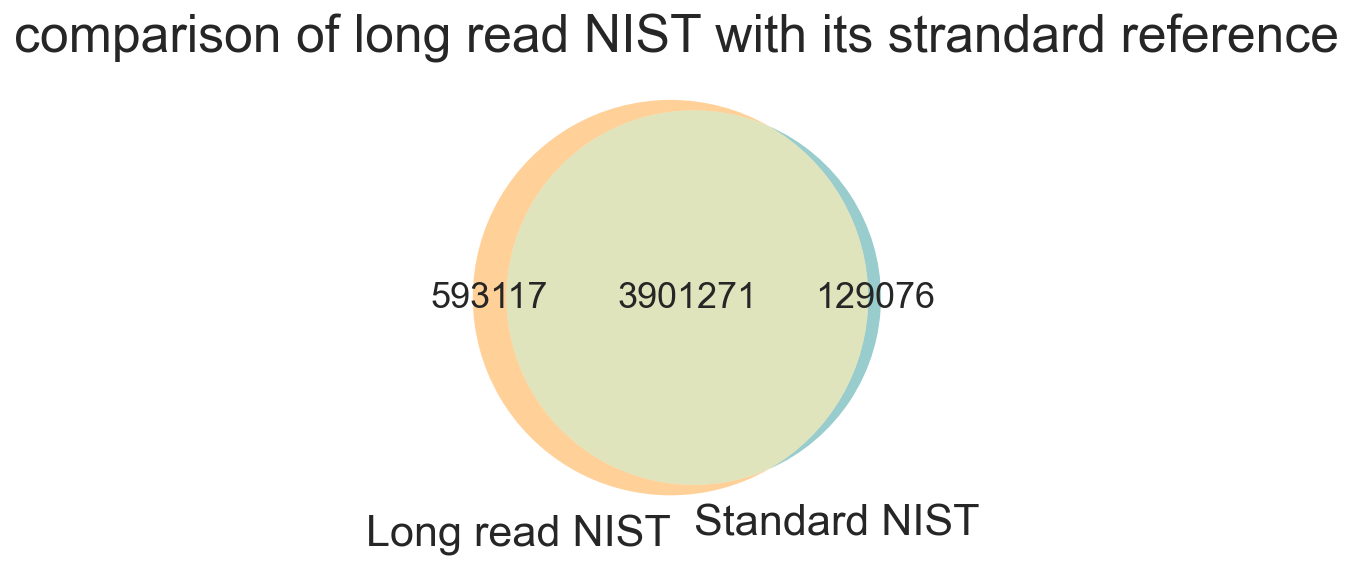

In [164]:
plt.title('comparison of long read NIST with its strandard reference')
v1=venn.venn2(subsets = (593117,129076,3901271), set_labels = ('Long read NIST', 'Standard NIST'), 
         set_colors=(color1, color2))
# v1.get_label_by_id('10').set_text('89.8%')
# v1.get_label_by_id('01').set_text('96.9%')

In [ ]:
REF vs SHORT
Found 3850385 sites common to both files.
Found 108615 sites only in main file.
Found 832304 sites only in second file.
Found 80201 non-matching overlapping sites.
After filtering, kept 4039201 out of a possible 4039201 Sites

In [157]:
color3="blue"
cal_overlap(3850385,832304,108615)

1st overlap:  82.22593898505751
2nd overlap:  97.25650416771911


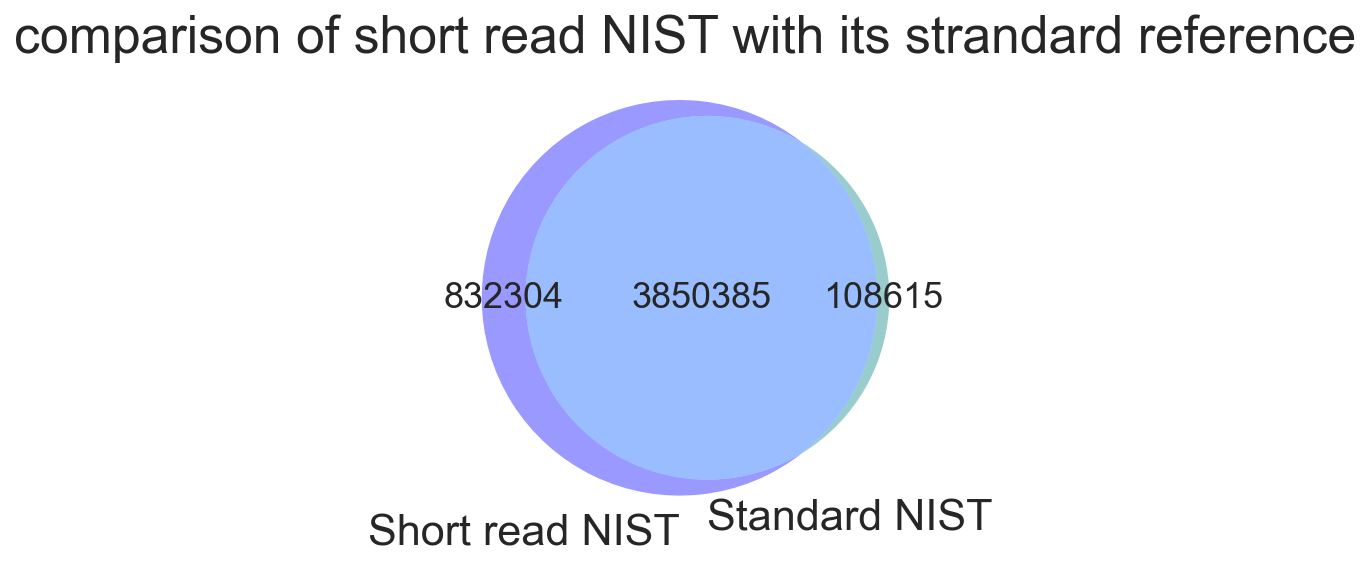

In [161]:
plt.title('comparison of short read NIST with its strandard reference')
v2=venn.venn2(subsets = (832304,108615,3850385), set_labels = ('Short read NIST', 'Standard NIST'), 
         set_colors=(color3, color2))

In [ ]:
# compare short and long
LONG VS SHORT
Found 4154024 sites common to both files.
Found 235884 sites only in main file.
Found 495532 sites only in second file.
Found 113334 non-matching overlapping sites.
After filtering, kept 4503242 out of a possible 4503242 Sites

In [165]:
#  cal_overlap(common, left_uniq, right_uniq)
cal_overlap(4154024, 235884, 495532)

1st overlap:  94.62667554764245
2nd overlap:  89.34238021867034


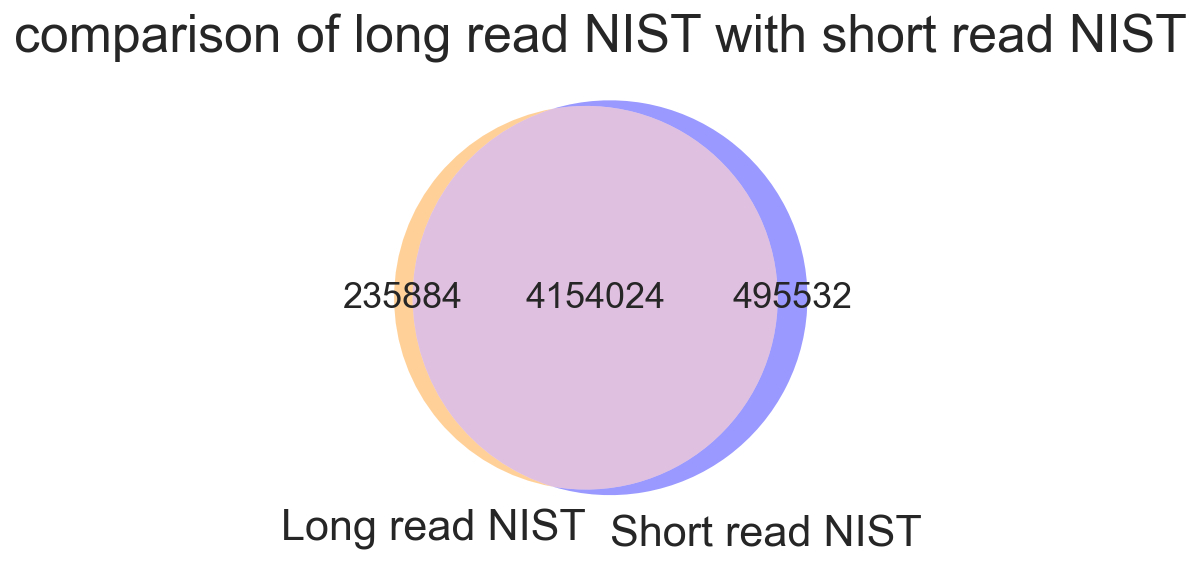

In [167]:
plt.title('comparison of long read NIST with short read NIST')
v4=venn.venn2(subsets = (235884, 495532,4154024), set_labels = ('Long read NIST', 'Short read NIST'), 
         set_colors=(color1, color3))

In [ ]:
# calcualte the three sets

# calculate precison, recall of the sequencing platform

## Calculate metrics:

Ref vs long: 

REF VS LONG
Found 3901271 sites common to both files.
Found 129076 sites only in main file.
Found 593117 sites only in second file.
Found 8854 non-matching overlapping sites.
After filtering, kept 4039201 out of a possible 4039201 Sites

TP = the overlapping: i.e, common
FN = REF_uniqe
FP = Long_unique
TN = 0


recall = 100* TP/(TP+FN) 
precision = 100*TP/(TP+FP)
accuracy = 100* (TP+FN)/(total)



In [273]:

def cal_metrics(overlapping, ref_uniq, sample_uniq, TN=0):
    recall = 100* overlapping/(overlapping+ref_uniq) 
    precision = 100*overlapping/(overlapping+sample_uniq)
    accuracy = 100* (overlapping+ref_uniq)/(overlapping+sample_uniq+ref_uniq+TN)
    print(f'Recall is {recall:.2f}%')
    print(f'Precision is {precision:.2f}%')
    print(f'Accuracy is {accuracy:.2f}%')

In [274]:
cal_metrics(3901271, 129076, 593117)

Recall is 96.80%
Precision is 86.80%
Accuracy is 87.17%


## Do filtering on FS and QD

In [ ]:
# It is better fo remove FS > 60 for SNPs and FS > 200 for Indel
# Also remove those with Guality by Depth 2
# OR remove those with DP < 10 
# or AF < 0.05
# or INDELS

In [243]:
# the FS scores in our data is 
# the value fo FS don't use ""
filt1= (df["FS"] > 60)&(df["TYPE"]==0)
filt2 = (df["FS"] > 200)&(df["TYPE"]==1)
filt3 = (df["QD"] < 2)
filt4 = (df["DP"] < 10)
filt5 = (df["AF"] < 0.05)
filt6 = (df["AF"] < 0.01)
filt7 = (df["MQ"] < 40)

In [245]:
print("SNPs with FS > 60: ", len(df[filt1]))
print("INDEL with FS > 200: ", len(df[filt2]))
print("variants with QD < 2: ", len(df[filt3]))
print("variants with DP < 10: ", len(df[filt4]))
print("variants with AF < 0.05: ", len(df[filt5]))
print("variants with AF < 0.01: ", len(df[filt6]))
print("variants with MQ < 40: ", len(df[filt7]))

SNPs with FS > 60:  13
INDEL with FS > 200:  0
variants with QD < 2:  368
variants with DP < 10:  26734
variants with AF < 0.05:  897
variants with AF < 0.01:  816
variants with MQ < 40:  1879


In [227]:
df.shape

(339850, 10)

In [228]:
df_filt_FS = df[(~filt1) & (~filt2)]
print(df_filt_FS.shape)

(339837, 10)


In [229]:
df_filt_FS_QD = df_filt_FS[df_filt_FS["QD"] > 2]
print(df_filt_QD.shape)

(339469, 10)


In [238]:
df_filt_FS_QD_AF = df_filt_FS_QD[df_filt_FS_QD["AF"] >= 0.01]
print(df_filt_FS_QD_AF.shape)

(338654, 10)


In [247]:
df_filt_FS_QD_AF_MQ = df_filt_FS_QD_AF[df_filt_FS_QD_AF["MQ"] >= 40]
print(df_filt_FS_QD_AF_MQ.shape)

(336808, 10)


In [248]:
df_filt_FS_QD_AF_MQ_DP = df_filt_FS_QD_AF_MQ[df_filt_FS_QD_AF_MQ["DP"] >= 10]
print(df_filt_FS_QD_AF_MQ_DP.shape)

(311166, 10)


In [246]:
df_filt_FS_QD_AF_DP_MQ = df_filt_FS_QD_AF_DP[df_filt_FS_QD_AF_DP["MQ"] >= 40]
print(df_filt_FS_QD_AF_DP_MQ.shape)

(311166, 10)


In [249]:
# remove INDEL
df_filt_FS_QD_AF_DP_MQ_SNP = df_filt_FS_QD_AF_DP_MQ[df_filt_FS_QD_AF_DP_MQ["TYPE"]!=1]
print(df_filt_FS_QD_AF_DP_MQ_SNP.shape)

(268478, 10)


## Calculate the accuracy after each step of filtering

print(f'pi = {x:.2f}')

In [202]:
def cal_cal_2(df, column="UNMATCH"):
    match = df[column].value_counts().iloc[0]
    unmatch = df[column].value_counts().iloc[1]
    accuracy = 100*match/(match + unmatch)
    print(f'{accuracy:.2f}%')  

In [203]:
cal_cal_2(df)

89.76%


In [250]:
for item in [df, df_filt_FS, df_filt_FS_QD, df_filt_FS_QD_AF, df_filt_FS_QD_AF_MQ, df_filt_FS_QD_AF_MQ_DP, df_filt_FS_QD_AF_DP_MQ_SNP]:
    cal_cal_2(item)

89.76%
89.76%
89.83%
89.82%
90.19%
93.04%
95.38%


In [260]:
%ls -lth

total 110112
-rw-r--r--@ 1 pengl7  NIH\Domain Users   473B Sep 28 16:46 sum of variants filtering.csv
-rw-r--r--@ 1 pengl7  NIH\Domain Users   9.7K Sep 28 16:43 sum of variants filtering.xlsx
-rw-r--r--  1 pengl7  NIH\Domain Users    20M Sep 28 13:03 long_cleared_QD.csv
-rw-r--r--  1 pengl7  NIH\Domain Users    21M Sep 25 16:58 long_cleared.csv
-rw-r-----  1 pengl7  NIH\Domain Users    12M Sep 25 10:35 long4_with_title


In [264]:
after_filt_df = pd.read_csv("sum of variants filtering.csv")